Stroke Rehabilitation

Data Handling and Analysis

In [1]:
from scipy.io import loadmat
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder_path = "E:\Dataset"


In [3]:
files = os.listdir(folder_path)
print("Dataset files:", files)

Dataset files: ['code', 'code.zip', 'dataset_description.json', 'edffile', 'edffile.zip', 'extracted_code', 'participants.json', 'participants.tsv', 'README.md', 'sourcedata', 'sourcedata.zip', 'stimuli', 'stimuli.zip', 'task-motor-imagery_channels.tsv', 'task-motor-imagery_coordsystem.json', 'task-motor-imagery_eeg.json', 'task-motor-imagery_electrodes.tsv', 'task-motor-imagery_events.json', 'task-motor-imagery_events.tsv', 'test_env']


In [5]:


# Load participants.tsv into a DataFrame
participants_df = pd.read_csv(os.path.join(folder_path, "participants.tsv"), sep="\t")
print("Participants DataFrame:")
print(participants_df.head())  # View the first few rows of the dataset
print(participants_df.info()) # et basic info
print(participants_df.describe())

print("-----------------------------------------")
# Load task-motor-imagery_events.tsv into a DataFrame
events_df = pd.read_csv(os.path.join(folder_path, "task-motor-imagery_events.tsv"), sep="\t")
print("Events DataFrame:")
print(events_df.head())
print(events_df.info())
print(events_df.describe())


Participants DataFrame:
  Participant_ID  Gender  Age  Duration ParalysisSide Handedness IsFirstTime  \
0         sub-01    male   45         1         right      right         yes   
1         sub-02    male   60         2          left      right         yes   
2         sub-03    male   60         2          left      right          no   
3         sub-04    male   56        14         right      right         yes   
4         sub-05  female   44         4          left      right         yes   

                                      StrokeLocation  NIHSS  MBI  mRS  
0                                          Left pons     11   50    4  
1                                         Right pons      3   55    4  
2  Left cerebellum, bilateral paraventricular, Ri...      3   90    1  
3  Left frontal parietal cortex, Left centrum sem...      6   90    3  
4                                          Left pons      4   60    4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0

In [6]:
# Check for missing values
print(participants_df.isnull().sum())

# Option 1: Drop rows/columns with missing values
participants_df.dropna(axis=0, inplace=True)

# Option 2: Fill missing values (imputation)
participants_df['Age'].fillna(participants_df['Age'].median(), inplace=True)
participants_df['Gender'].fillna('unknown', inplace=True)


Participant_ID    0
Gender            0
Age               0
Duration          0
ParalysisSide     0
Handedness        0
IsFirstTime       0
StrokeLocation    0
NIHSS             0
MBI               0
mRS               0
dtype: int64


In [7]:
# Check for missing values
print(events_df.isnull().sum())

onset              0
duration           0
trial_type         0
response_time    120
value              0
stim_file          0
dtype: int64


In [8]:
# Create a backup of the original DataFrame
events_df_backup = events_df.copy()

# Drop the response_time column in the working DataFrame
events_df = events_df.drop(columns=['response_time'])


In [9]:
# Check for missing values for events_df
print(events_df.isnull().sum())

print("-----------------------------------")

# Check for missing values of backup 
print(events_df_backup.isnull().sum())


onset         0
duration      0
trial_type    0
value         0
stim_file     0
dtype: int64
-----------------------------------
onset              0
duration           0
trial_type         0
response_time    120
value              0
stim_file          0
dtype: int64


In [10]:
tmic_df = pd.read_csv(os.path.join(folder_path, "task-motor-imagery_channels.tsv"), sep="\t")
print("task-motor-imagery_channels DataFrame:")
print(tmic_df.head())  # View the first few rows of the dataset


print("-------------------------------------------------------")

# Load task-motor-imagery_events.tsv into a DataFrame
tmiElectrodes_df = pd.read_csv(os.path.join(folder_path, "task-motor-imagery_electrodes.tsv"), sep="\t")
print("Electrode DataFrame:")
print(tmiElectrodes_df.head())


task-motor-imagery_channels DataFrame:
  name type units status  status_description
0  FP1  EEG    μV   good                 NaN
1  FP2  EEG    μV   good                 NaN
2   Fz  EEG    μV   good                 NaN
3   F3  EEG    μV   good                 NaN
4   F4  EEG    μV   good                 NaN
-------------------------------------------------------
Electrode DataFrame:
  name      X      Y       Z
0  FP1  0.950  0.309 -0.0349
1  FP2  0.950 -0.309 -0.0349
2   Fz  0.719 -0.000  0.6950
3   F3  0.673  0.545  0.5000
4   F4  0.673 -0.545  0.5000


In [11]:
# check the missing values for task-motor-imagery_channels
print(tmic_df.isnull().sum())

print("--------------------------------")

# check the missing values for task-motor-imagery_Electrodes
print(tmiElectrodes_df.isnull().sum())

name                   0
type                   0
units                  0
status                 0
status_description    31
dtype: int64
--------------------------------
name    0
X       0
Y       0
Z       0
dtype: int64


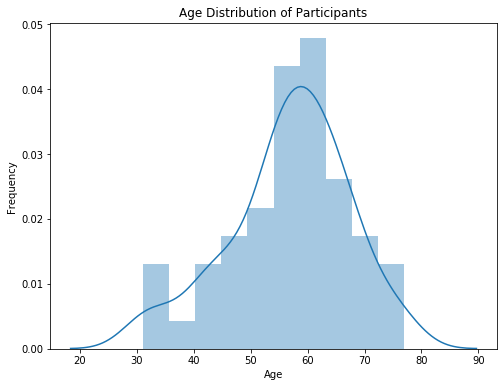

In [12]:
# Visualize distribution of age in participants data
plt.figure(figsize=(8, 6))
sns.distplot(participants_df['Age'], kde=True, bins=10)
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
